In [1]:
import jax.numpy as np
from jax import grad
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

In [2]:
plt.rcParams["animation.html"] = "jshtml"

In [3]:
class BernoulliDistribution:
    @staticmethod
    def pdf(x, p):
        return x*p + (1.0-x)*(1.0-p)
    
    @staticmethod
    def logpdf(x, p):
        return np.log(BernoulliDistribution.pdf(x, p))
    
    @staticmethod
    def sample(p, n=1):
        return random.choices([1.0, 0.0], weights=[p, 1.0-p], k=n)
    
    @staticmethod
    def plot(p, ax=None):
        ax = ax or plt.gca()
        x = np.array([0.0, 1.0])
        return ax.bar(x, BernoulliDistribution.pdf(x, p), width=0.25)

In [4]:
class BernoulliDistributionBlackboxOptimizer:
    def __init__(self, f, lr, p=0.5, n=100):
        self.f = f
        self.lr = lr
        self.p = p
        self.n = n
    
    def step(self):
        samples = BernoulliDistribution.sample(self.p, n=self.n)
        dj_dp = np.array([self.f(x) * grad(BernoulliDistribution.logpdf, 1)(x, self.p) for x in samples]).mean()
        self.p = max(0.0, min(1.0, self.p + self.lr * dj_dp))

In [5]:
def make_animation_for_function(f, steps=200, lr=0.1):
    optimizer = BernoulliDistributionBlackboxOptimizer(f, lr=lr)
    frames = []
    fig, ax = plt.subplots()
    for i in range(steps):
        optimizer.step()
        bars = BernoulliDistribution.plot(optimizer.p, ax=ax)
        frames.append((bars, optimizer.p))
    plt.close()
    
    fig, ax = plt.subplots()
    bars_d = ax.bar([0, 1], [1.0-optimizer.p, optimizer.p])
    ax.set_ylim([0, 1])

    def animate(frames):
        frame_d, p = frames
        bars_d[0].set_height(frame_d[0].get_height())
        bars_d[1].set_height(frame_d[1].get_height())
        bars_d.set_label(f"p = {p:.3f}")
        ax.legend()
        return bars_d[0], bars_d[1]

    return animation.FuncAnimation(fig, animate, frames=frames, blit=True)

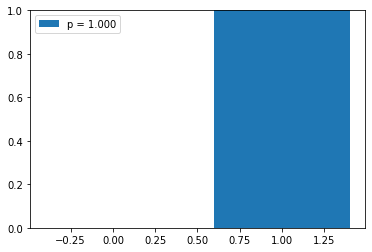

In [6]:
make_animation_for_function(lambda x: x, lr=0.01, steps=100)

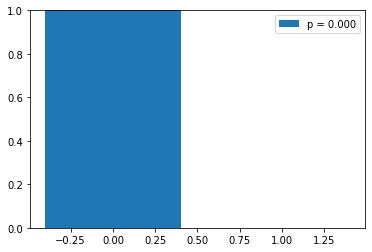

In [7]:
make_animation_for_function(lambda x: -x, lr=0.01, steps=100)

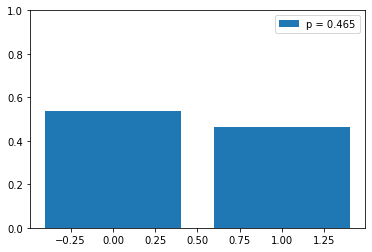

In [8]:
make_animation_for_function(lambda x: random.randint(0, 1), lr=0.01, steps=100)

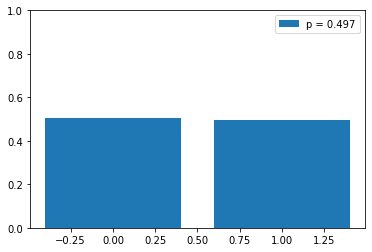

In [9]:
from itertools import count
class Counter(count):
    def __call__(self):
        return next(self)

counter = Counter(1)

make_animation_for_function(lambda x: x*(2*int(np.sin((counter()+2500) * np.pi/5000) > 0)-1), lr=0.01, steps=250)